# Dataframe Pivot and Visualizer Test

In [2]:
import os
import sys
import pandas as pd

src_path = os.path.abspath(os.path.join(os.getcwd(),'..','..'))
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer, dataframe_pivot

q = query_engines.QueryEngines()

# Pivot

In [3]:
QUERY_NAME = 'test_dataframe_visualizer.sql' # With sql
START_DATE = "'2025-02-09'"
END_DATE = "'2025-02-12'"
CITIES = "'BCN', 'MAD'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'cities', 'value': CITIES}
]

q.prepare_query(
    QUERY_NAME,
    params=params,
    output_file=QUERY_NAME,
    load_previous=True
)

df = q.query_run_starburst()
df.head()

,p_creation_date,order_id,order_final_status,order_vertical,order_total_purchase_eur,order_total_purchase_local
0,2025-02-09,101208175225,DeliveredStatus,QCommerce,17.00,17.00
1,2025-02-09,101207543662,DeliveredStatus,QCommerce,0.00,0.00
2,2025-02-09,101207739567,DeliveredStatus,Food,12.25,12.25
3,2025-02-09,101208429721,DeliveredStatus,Food,41.03,41.03
4,2025-02-09,101207268905,DeliveredStatus,Food,15.34,15.34


In [4]:
# Create an instance of DataFramePivot
dp = dataframe_pivot.DataFramePivot(df)

TIME = 'p_creation_date'
DIMENSIONS = ['order_final_status', 'order_vertical']
MEASURES = ['order_total_purchase_eur', 'order_total_purchase_local']
AFFUNCS = ['sum','mean']

# Call the pivot_and_aggregate method
p = dp.pivot_and_aggregate(
    t=TIME,
    dimensions=DIMENSIONS,
    measures=MEASURES,
    aggfuncs=AFFUNCS
)

p

,p_creation_date,order_total_purchase_eur_mean_CanceledStatus_Food,order_total_purchase_eur_mean_CanceledStatus_LaaS,order_total_purchase_eur_mean_CanceledStatus_QCommerce,order_total_purchase_eur_mean_DeliveredStatus_Food,order_total_purchase_eur_mean_DeliveredStatus_LaaS,order_total_purchase_eur_mean_DeliveredStatus_QCommerce,order_total_purchase_eur_sum_CanceledStatus_Food,order_total_purchase_eur_sum_CanceledStatus_LaaS,order_total_purchase_eur_sum_CanceledStatus_QCommerce,...,order_total_purchase_local_mean_CanceledStatus_QCommerce,order_total_purchase_local_mean_DeliveredStatus_Food,order_total_purchase_local_mean_DeliveredStatus_LaaS,order_total_purchase_local_mean_DeliveredStatus_QCommerce,order_total_purchase_local_sum_CanceledStatus_Food,order_total_purchase_local_sum_CanceledStatus_LaaS,order_total_purchase_local_sum_CanceledStatus_QCommerce,order_total_purchase_local_sum_DeliveredStatus_Food,order_total_purchase_local_sum_DeliveredStatus_LaaS,order_total_purchase_local_sum_DeliveredStatus_QCommerce
0,2025-02-09,6.176264,0.0,1.863953,25.626994,0.0,23.607873,7108.88,0.0,1202.25,...,1.863953,25.626994,0.0,23.607873,7108.88,0.0,1202.25,2427132.64,0.0,406645.61
1,2025-02-10,3.910036,0.0,1.735391,23.607710,0.0,26.476842,2166.16,0.0,820.84,...,1.735391,23.607710,0.0,26.476842,2166.16,0.0,820.84,1166716.66,0.0,424926.84
2,2025-02-11,3.816941,0.0,1.917233,24.457560,0.0,26.093053,2507.73,0.0,1094.74,...,1.917233,24.457560,0.0,26.093053,2507.73,0.0,1094.74,1300701.98,0.0,372921.92
3,2025-02-12,4.050440,0.0,1.594783,24.400674,0.0,25.630542,3495.53,0.0,993.55,...,1.594783,24.400674,0.0,25.630542,3495.53,0.0,993.55,1313415.08,0.0,367721.38


# Lineplot

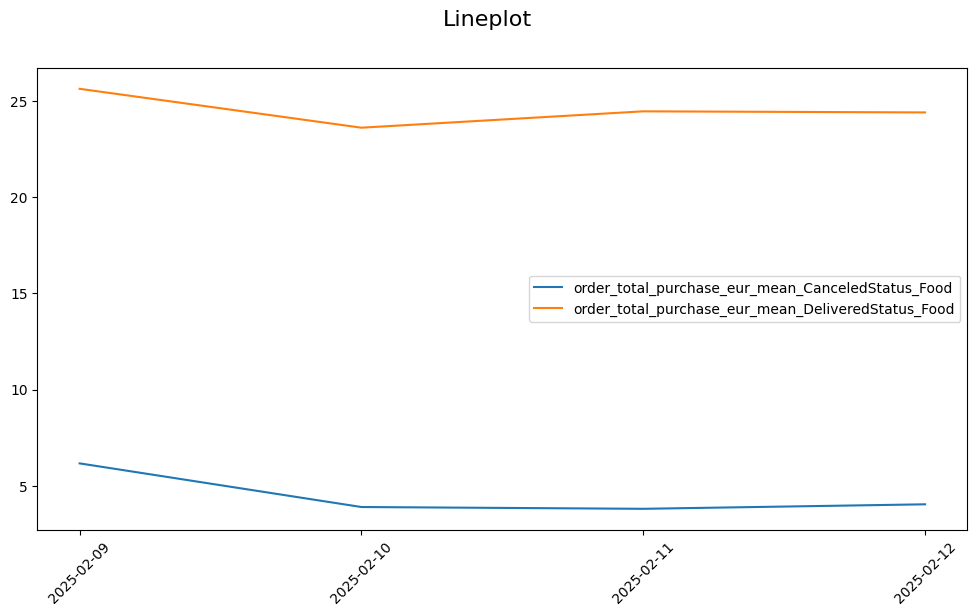

In [5]:
v = dataframe_visualizer.DataFrameVisualizer(p)

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['order_total_purchase_eur_mean_CanceledStatus_Food', 'order_total_purchase_eur_mean_DeliveredStatus_Food'],
        'colors': ['blue', 'orange'],
        'styles': ['-','-'],
        'legend': True
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 12,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None,
    'y_limits': None,
    'log_axis': None,
    'title': 'Lineplot'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Scatterplot

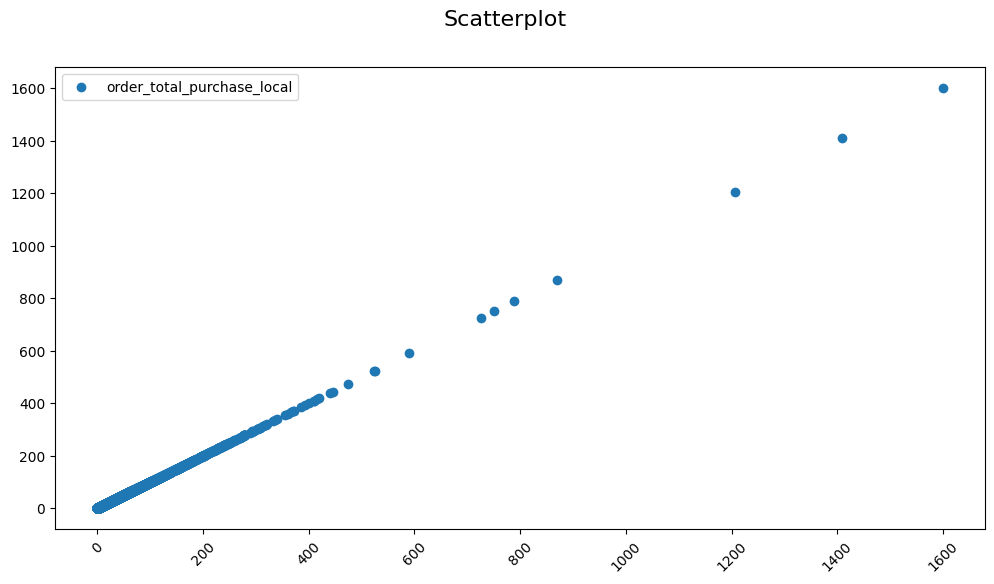

In [6]:
v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        'plot_type': 'scatterplot', 
        'x_column': 'order_total_purchase_eur', 
        'y_columns': ['order_total_purchase_local'],
        'colors': ['blue'],
        'legend': True
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 12,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None,
    'y_limits': None,
    'log_axis': None,
    'title': 'Scatterplot'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Barplot

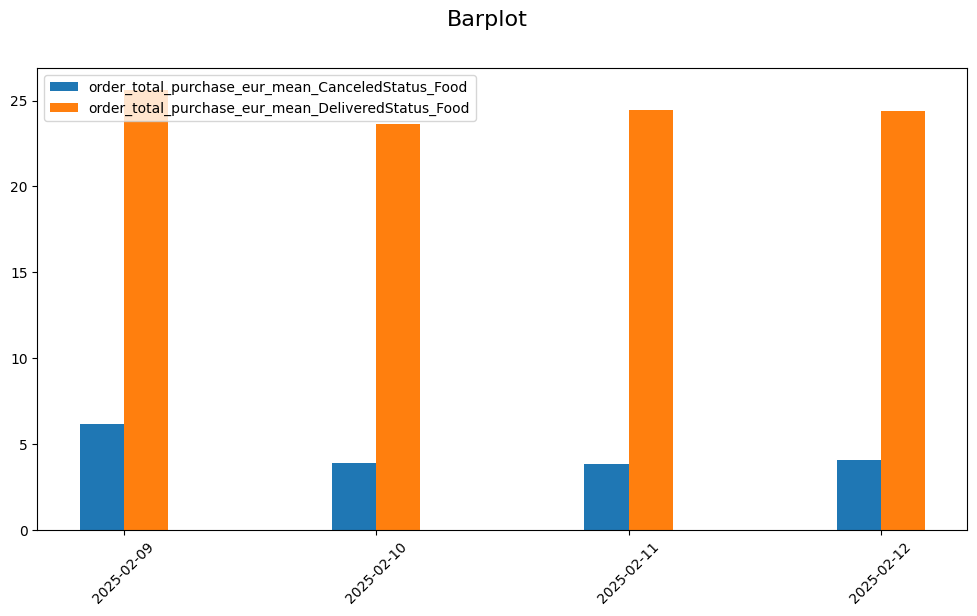

In [7]:
v = dataframe_visualizer.DataFrameVisualizer(p)

plot_params = [
    {
        'plot_type': 'barplot', 
        'x_column': 'p_creation_date', 
        'y_columns': ['order_total_purchase_eur_mean_CanceledStatus_Food', 'order_total_purchase_eur_mean_DeliveredStatus_Food'],
        'colors': ['blue', 'orange'],
        'bar_width': 0.35,
        'legend': True
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 12,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None,
    'y_limits': None,
    'log_axis': None,
    'title': 'Barplot'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Histogram & Histogram Acummulated

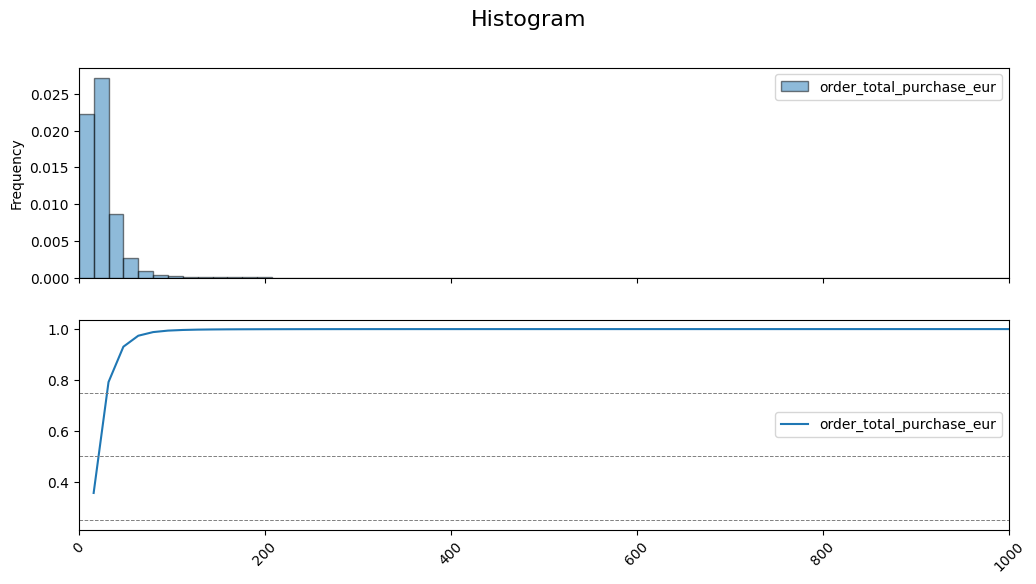

In [8]:
v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        'plot_type': 'histogram', 
        'y_columns': ['order_total_purchase_eur'],
        'colors': ['blue'],
        'bins': 100,
        'legend': True
    },
    {
        'plot_type': 'histogram_acummulated', 
        'y_columns': ['order_total_purchase_eur'],
        'colors': ['blue'],
        'bins': 100,
        'legend': True
    },
]

figure_params = {
    'n_plots': 2,
    'fig_length': 12,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': [(0, 1000)],
    'y_limits': None,
    'log_axis': None,
    'title': 'Histogram'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Histogram Accumulated

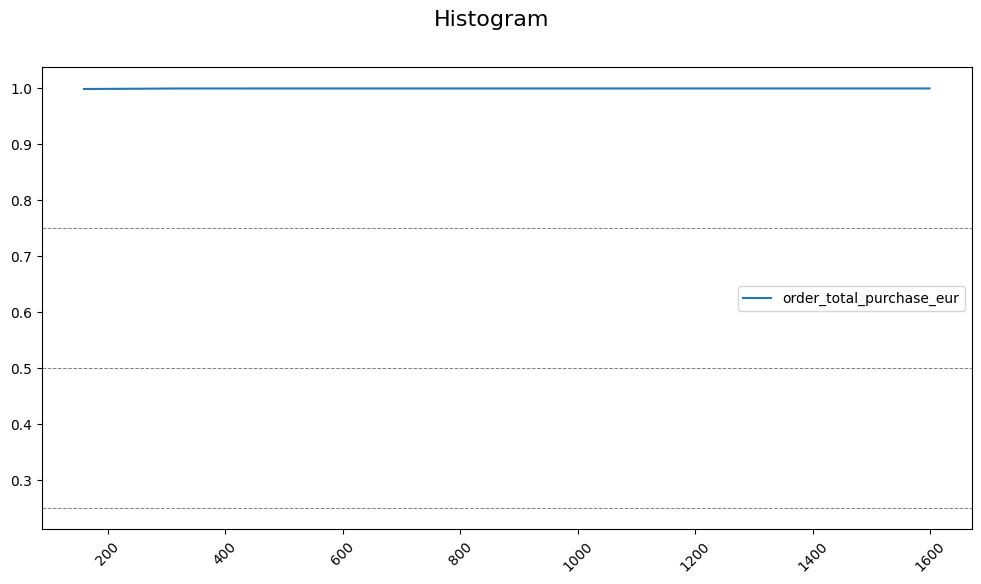

In [9]:
v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        'plot_type': 'histogram_acummulated', 
        'y_columns': ['order_total_purchase_eur'],
        'colors': ['blue'],
        'bins': 10,
        'legend': True
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 12,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None,
    'y_limits': None,
    'log_axis': None,
    'title': 'Histogram'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Box and whiskers

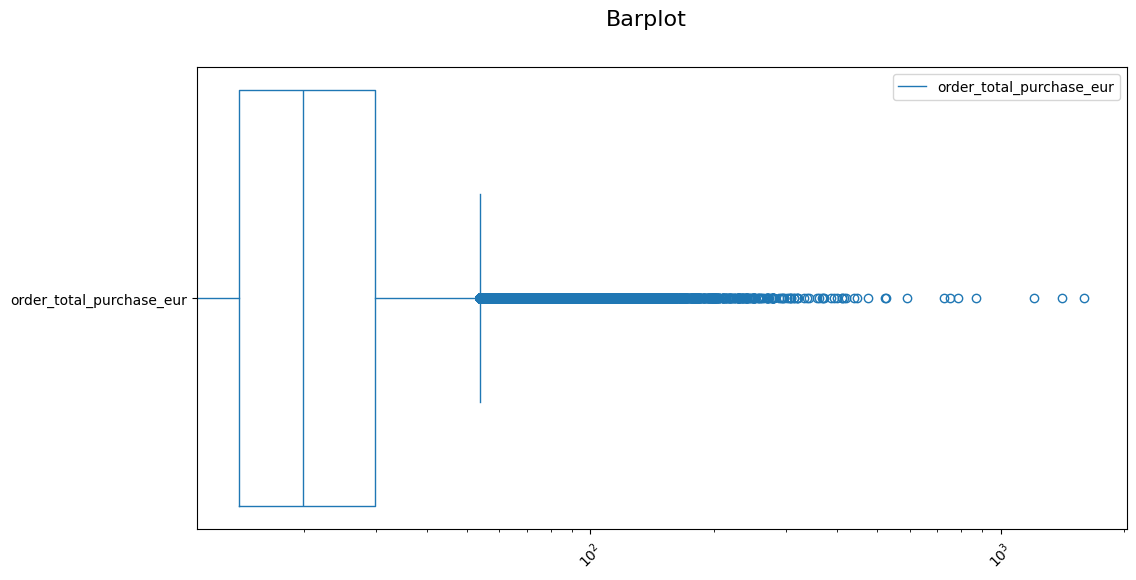

In [10]:
v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    # default LB = Q1 - 1.5*IQR, UB = Q3 + 1.5*IQR
    # IQR = Q3 - Q1, Q1 = 25th percentile, Q3 = 75th percentile
    {
        'plot_type': 'boxplot_and_whiskers', 
        'y_columns': ['order_total_purchase_eur'],
        'colors': ['blue'],
        'legend': True
    },
]

figure_params = {
    'n_plots': 1,
    'fig_length': 12,
    'fig_height': 6,
    'x_rotation': 45,
    'share_x': True,
    'share_y': False,
    'x_limits': None,
    'y_limits': None,
    'log_axis': 'x',
    'title': 'Barplot'
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)